___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Aula 10

<div id="indice"></div>

## Índice

- [Teoria: Distribuição Binomial](#teoria)
    - [Esperança e Variância](#esperanca-variancia)
- [DETRAN](#detran)
    - [Modelo teórico](#modelo-teorico)
        - [Exercício 1](#ex1)
        - [Exercício 2](#ex2)
    - [Resultados empíricos](#resultados-empiricos)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
    - [Comparação: resultados empíricos X modelo teórico](#comparacao)
        - [Opção 1: Frequências relativas X Probabilidades teóricas](#opcao1)
        - [Opção 2: Frequência relativa acumulada X Probabilidade acumulada](#opcao2)
        - [Exercício 5](#ex5)
        - [Exercício 6](#ex6)
        - [Exercício 7](#ex7)
- [Lista de comandos utilizados neste notebook](#comandos)

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

<div id="detran"></div>

# <font color='blue'>DETRAN</font> 

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**
>
> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*
>
> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. 

Se, ao final da inspeção, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

<div id="modelo-teorico"></div>

## Modelo teórico

___

<div id="teoria"></div>

## Teoria: Distribuição Binomial

A distribuição binomial modela a número de sucessos (o evento de interesse) em uma determinada quantidade de tentativas. Mais formalmente, dizemos que uma variável aleatória $Y$ segue uma distribuição binomial utilizando a seguinte notação: $Y$~$Bin(n,p)$. Essa notação pode ser lida como: $Y$ segue uma distribuição binomial com $n$ tentativas e $p$ como probabilidade de sucesso em cada evento independente.

A função de probabilidade (lembrando: que associa uma probabilidade a cada valor possível de $Y$) é dada por:

$$P(Y=y)=\left(
\begin{array}{c}
    n \\
    y
\end{array}\right) p^y (1-p)^{(n-y)}$$

Para que um experimento possa ser modelado por uma distribuição binomial, ele precisa ter as seguintes propriedades:

- ser uma contagem de $n$ repetições (ou tentativas, ou ensaios) idênticas;
- cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso (o resultado de interesse, que não necessariamente é positivo) e o outro, fracasso;
- a probabilidade de sucesso para cada ensaio é denominada $p$ e será constante em cada repetição. Consequentemente, a probabilidade de fracasso $(1-p)$ também não varia de tentativa para tentativa;
- as tentativas são independentes.

<div id="esperanca-variancia"></div>

### Esperança e Variância

Se $Y$~$Bin(n,p)$, o valor esperado $E(Y)$ e a variância $Var(Y)$ são dados por:

$\qquad\qquad E(Y) = np$

$\qquad\qquad Var(Y) = np(1-p)$

___

<div id="ex1"></div>

### EXERCÍCIO 1

Assuma que a variável **Quantidade de itens vistoriados em não conformidade em 14 itens vistoriados** possa ser ajustada pelo modelo binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição binomial estão satisfeitas para o problema aqui me questão.

In [ ]:
PREENCHA COM AS SUAS RESPOSTAS:
    
- n = 14: número de vistorias realizadas
- p = 0,10: probabilidade de sucesso em cada vistoria

As propriedades da distribuição binomial [estão satisfeitas/não estão satisfeitas] para o problema em questão?
Verifique as propriedades de um ensaio Binomial: 
[Como os itens vistoriados são independentes, ou seja, são tentativas idênticas e há somente 2 resultados possíveis, fracasso ou sucesso, e a probabilidade de sucesso é denotada por um p constante, é possível afirmar que as propriedades estão satisfeitas.]

**Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos exercícios!**

<div id="ex2"></div>

### EXERCÍCIO 2

<div id="pmf-stats"></div>

1. Consulte a [documentação do método `stats.binom.pmf`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html). Utilizando esse método, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade, ou seja, de 0 a 14, quando $n=14$ e $p=0,10$. Armazene as probabilidades em uma lista (probabilidades de todas as quantidades possíveis, de 0 a 14) e guarde esta lista em uma variável chamada `probabilidades_teoricas`.
1. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando os métodos `stats.binom.mean` e `stats.binom.var` (a documentação está na mesma página do método `stats.binom.pmf`) e compare com a esperança e variância calculados a partir das [fórmulas da distribuição binomial](#esperanca-variancia).

*Respostas esperadas para esperança e variância respectivamente: 1.4000000000000001 ; 1.2600000000000002*

In [43]:
# ESCREVA SEU CÓDIGO AQUI
n,p = 14,0.1
E_mean = stats.binom.mean(n,p)
E_mean

1.4000000000000001

In [44]:
Var_var = stats.binom.var(n,p)
Var_var

1.2600000000000002

In [45]:
probabilidades_teoricas = []
for y in range(0,15):
    probabilidades_teoricas.append(stats.binom.pmf(y,n,p))
probabilidades_teoricas

[0.22876792454960998,
 0.3558612159660614,
 0.2570108781977114,
 0.11422705697676022,
 0.03490271185401001,
 0.007756158189780027,
 0.0012926930316300015,
 0.0001641514960800007,
 1.5959173230000058e-05,
 1.1821609800000021e-06,
 6.56756100000003e-08,
 2.653560000000011e-09,
 7.371000000000037e-11,
 1.2600000000000108e-12,
 1.0000000000000058e-14]

<div id="resultados-empiricos"></div>

## Resultados empíricos

A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações:

- **Tipo**: tipo de carro (1: Popular e 2: Não Popular)
- **Quantidade**: quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14) em 14 itens vistoriados

Vamos começar carregando a base em um `DataFrame`:

In [46]:
import os
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
c:\Users\enric\Documents\GitHub\CD21-2\aula10



In [47]:
filename = 'Carros.txt'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo Carros.txt está na mesma pasta do notebook, yay!


In [48]:
carros = pd.read_table('Carros.txt', sep=' ')
carros.head()

,Tipo,Quantidade
1,1,0
2,1,2
3,1,2
4,1,3
5,1,1


In [49]:
# criando outro df para o último exercício
filter = (carros.Tipo == 1)
carros_popular = carros[filter]
carros_popular

,Tipo,Quantidade
1,1,0
2,1,2
3,1,2
4,1,3
5,1,1
...,...,...
1796,1,5
1797,1,2
1798,1,1
1799,1,1


<div id="ex3"></div>

### EXERCÍCIO 3

Considerando todos os carros, gere uma tabela de frequências relativas da quantidade de itens vistoriados em não conformidade (variável **Quantidade**). Armazene essa tabela em uma variável chamada `frequencias_relativas`. 

**Observação:** utilize o método `.sort_index()` no resultado do `.value_counts()` para corrigir a ordenação.

In [50]:
# ESCREVA O CÓDIGO DA SUA RESPOSTA AQUI
veiculos=[]
for q in carros.Quantidade:
    veiculos.append('Carro')
carros.insert(0,'Veiculo', veiculos)
carros.drop(columns='Tipo',inplace=True)
carros

,Veiculo,Quantidade
1,Carro,0
2,Carro,2
3,Carro,2
4,Carro,3
5,Carro,1
...,...,...
2996,Carro,0
2997,Carro,1
2998,Carro,1
2999,Carro,0


In [51]:
frequencias_relativas = carros.value_counts(normalize=True)
frequencias_relativas.sort_index(inplace=True)
frequencias_relativas

Veiculo  Quantidade
Carro    0             0.288000
         1             0.316667
         2             0.221333
         3             0.108333
         4             0.046333
         5             0.015667
         6             0.002667
         7             0.000667
         8             0.000333
dtype: float64

<div id="ex4"></div>

### EXERCÍCIO 4

1. **A partir da tabela de frequências relativas**, calcule a média, variância e desvio padrão da quantidade de itens vistoriados em não conformidade. Ou seja, sem utilizar as funções `.mean()`, `.var(ddof=0)` e `std(ddof=0)`. Para isso, será necessário utilizar as fórmulas vistas em aula:

    $\qquad\qquad\overline{y} = \sum\limits_y y\cdot fr_y$

    $\qquad\qquad var(y) = \sum\limits_y (y-\overline{y})^2\cdot fr_y$
    
    $\qquad\qquad dp(y) = \sqrt{var(y)}$

sendo $fr_y$ a frequência relativa da quantidade $y$ na amostra.

1. Compare os resultados com a média, variância populacional e desvio padrão populacional obtidos a partir das funções `.mean()` `.var(ddof=0)` e `.std(ddof=0)`.

1. Explique sucintamente o que você pode concluir a partir desses valores.

*Respostas esperadas Média, Variância e Desvio Padrão respectivamente: 1.3713333 ; 1.5794449 ; 1.25675967*

In [52]:
# ESCREVA O CÓDIGO DA SUA RESPOSTA AQUI
mediana = 0
for y in range(0,9):
    mediana += y * frequencias_relativas[y]
mediana

1.3713333333333333

In [53]:
variancia = 0
for y in range(0,9):
    variancia += (y-mediana)**2 * frequencias_relativas[y]
variancia

1.5794448888888888

In [54]:
dp = variancia**0.5
dp

1.2567596782555084

In [ ]:
# ESCREVA SUAS CONCLUSÕES AQUI

<div id="comparacao"></div>

## Comparação: resultados empíricos *vs* modelo teórico

Vamos comparar as probabilidades teóricas ([exercício 2](#ex2)) com as frequências relativas observadas nos dados ([exercício 4](#ex4)). Para isso, temos, por exemplo, as duas opções gráficas a seguir para verificar se os resultados empíricos se encaixam no modelo teórico proposto. Procure entender pelo menos a ideia do código que gera os gráficos abaixo (pode ser necessário procurar alguma documentação, mas não se preocupe em entender todos os detalhes), eles serão úteis na última questão.

<div id="opcao1"></div>

### Opção 1: Frequências relativas *vs* Probabilidades teóricas

A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade. Essa opção contrasta a frequência relativa $fr$ para um valor de $y$ com a probabilidade pontual $P(Y=y)$.

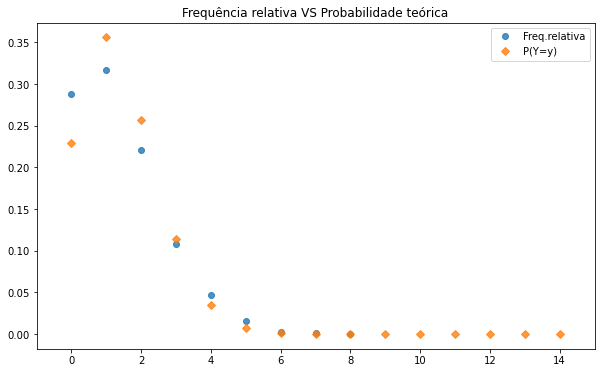

In [55]:
fr = frequencias_relativas   #Calculadas no Exercício 4 - Amostra
pr = probabilidades_teoricas #Calculadas no Exercício 1 - Modelo teórico

plt.figure(figsize=(10,6))
plt.plot(range(len(fr)), fr, 'o', alpha=0.8)
plt.plot(range(len(pr)), pr, 'D', alpha=0.8)
plt.legend(('Freq.relativa','P(Y=y)'), loc='upper right')
plt.title('Frequência relativa VS Probabilidade teórica')
plt.xlim(-1,15)
plt.show()

<div id="opcao2"></div>

### Opção 2: Frequência relativa acumulada *vs* Probabilidade acumulada

A segunda opção gráfica contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada $fra$ até $y$ com a probabilidade acumulada $P(Y\leq y)$.

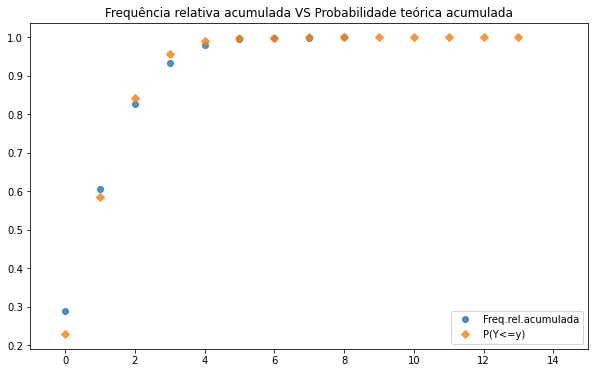

In [56]:
fra = fr.cumsum() #fra contem as frequencias relativas acumuladas calculadas no Exercício 1 - Amostra
n = 14
p = 0.1
fda = stats.binom.cdf(range(n), n=n, p=p) #fda contem as probabilidades acumuladas pelo modelo teorico

plt.figure(figsize=(10,6))
plt.plot(range(len(fra)), fra, 'o', alpha=0.8)
plt.plot(range(n), fda, 'D', alpha=0.8)
plt.legend(('Freq.rel.acumulada','P(Y<=y)'), loc='lower right')
plt.title('Frequência relativa acumulada VS Probabilidade teórica acumulada')
plt.xlim(-1,15)
plt.show()

<div id="ex5"></div>

### EXERCÍCIO 5

Baseado nos gráficos acima, refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão ([exercício 1](#ex1)).

In [ ]:
ESCREVA SUA RESPOSTA AQUI

<div id="ex6"></div>

### EXERCÍCIO 6

Na prática, qual a necessidade de um modelo probabilístico já que temos os dados observados?

In [ ]:
ESCREVA SUA RESPOSTA AQUI

<div id="ex7"></div>

### EXERCÍCIO 7

Considerando apenas os carros populares, o modelo binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável **Quantidade**? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição para que ela se ajuste aos dados. **Dica**: utilize a [fórmula de $E(Y)$](#esperanca-variancia).

*Resposta esperada para probabilide de sucesso estimada a partir dos carros populares: 0.13103174603174603*

In [59]:
# ESCREVA SEU CÓDIGO AQUI
fr = carros_popular.value_counts(normalize=True)
fr.sort_index(inplace=True)
fr

Tipo  Quantidade
1     0             0.149444
      1             0.283889
      2             0.295000
      3             0.166667
      4             0.072778
      5             0.026111
      6             0.004444
      7             0.001111
      8             0.000556
dtype: float64

In [65]:
E_Y = 0
for y in range(0,9):
    E_Y += y * fr.iloc[y]

p = E_Y / 14
p

0.13103174603174603

<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

- [`stats.binom.pmf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`stats.binom.mean`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`stats.binom.var`](#pmf-stats): ESCREVA AQUI O RESUMO
